In [157]:
import tensorflow

In [158]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [159]:
from xgboost import XGBClassifier
import pandas as pd  
import numpy as np  
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


In [161]:
df.PMV_Level

0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [162]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
feature_categories = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[column].dtype, np.number):
        feature_categories[column] = 'Numerical'
    else:
        feature_categories[column] = 'Categorical'

# Print feature categories
for feature, category in feature_categories.items():
    print(f"Feature: {feature}, Category: {category}")

Feature: Gender, Category: Categorical
Feature: Age, Category: Categorical
Feature: Study_Level, Category: Numerical
Feature: Floor_Level, Category: Numerical
Feature: Room_Orientation, Category: Categorical
Feature: No_Lights, Category: Numerical
Feature: No_Fans, Category: Numerical
Feature: No_Windows, Category: Numerical
Feature: No_Doors, Category: Numerical
Feature: Floor_Area, Category: Numerical
Feature: Distan_Windows, Category: Numerical
Feature: Temperature_(°C) , Category: Numerical
Feature: Humidity_(%), Category: Numerical
Feature: CO2_(PPM), Category: Numerical
Feature: PMV_Level, Category: Categorical
Feature: Lighting_Level, Category: Categorical


In [163]:
df.PMV_Level


0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [164]:
df.PMV_Level

0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [165]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [166]:
df.head() 

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [167]:
inputs = df.drop(['PMV_Level',], axis='columns')

In [168]:
target = df['PMV_Level']

In [169]:
inputs

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,0
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,2
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,5


In [170]:
target

0       0
1       0
2       1
3       1
4       2
       ..
1082    3
1083    3
1084    0
1085    3
1086    0
Name: PMV_Level, Length: 1087, dtype: uint8

In [171]:
import pandas as pd

# Assuming your input feature data is stored in 'df'
data_shape = df.shape
print(data_shape)

(1087, 16)


In [172]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [173]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
feature_categories = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[column].dtype, np.number):
        feature_categories[column] = 'Numerical'
    else:
        feature_categories[column] = 'Categorical'

# Print feature categories
for feature, category in feature_categories.items():
    print(f"Feature: {feature}, Category: {category}")

Feature: Gender, Category: Numerical
Feature: Age, Category: Numerical
Feature: Study_Level, Category: Numerical
Feature: Floor_Level, Category: Numerical
Feature: Room_Orientation, Category: Numerical
Feature: No_Lights, Category: Numerical
Feature: No_Fans, Category: Numerical
Feature: No_Windows, Category: Numerical
Feature: No_Doors, Category: Numerical
Feature: Floor_Area, Category: Numerical
Feature: Distan_Windows, Category: Numerical
Feature: Temperature_(°C), Category: Numerical
Feature: Humidity_(%), Category: Numerical
Feature: CO2_(PPM), Category: Numerical
Feature: PMV_Level, Category: Numerical
Feature: Lighting_Level, Category: Numerical


In [174]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [175]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [176]:
# Define SMOTE-Tomek Links
resample=SMOTEENN(random_state =42)
X, y = resample.fit_resample(X, y)

In [177]:
y.value_counts()

PMV_Level
4    236
6    134
2     96
3     81
0     37
5     21
1     12
Name: count, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [180]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [181]:
scaler = MinMaxScaler()

In [182]:
# Prevent data leakage by only fitting scaler to train data
scaler.fit(X_train)

MinMaxScaler()

In [183]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used for feature selection

In [184]:
from sklearn.decomposition import PCA

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=X_train_scaled.shape[1])
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the number of input features and number of classes
input_dim = X_train_pca.shape[1]
num_classes = len(np.unique(y_train))

# Define your model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_pca = model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=100, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1790 - loss: 1.9426 - val_accuracy: 0.4919 - val_loss: 1.6332
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6117 - loss: 1.5321 - val_accuracy: 0.6048 - val_loss: 1.3627
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6607 - loss: 1.2608 - val_accuracy: 0.6210 - val_loss: 1.1779
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 1.1014 - val_accuracy: 0.6613 - val_loss: 1.0097
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.9725 - val_accuracy: 0.6774 - val_loss: 0.8762
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7512 - loss: 0.7981 - val_accuracy: 0.7581 - val_loss: 0.7578
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.6748 - val_accuracy: 0.8387 - val_loss: 0.6672
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8179 - loss: 0.6440 - val_accuracy: 0.8710 - val_loss: 0.

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



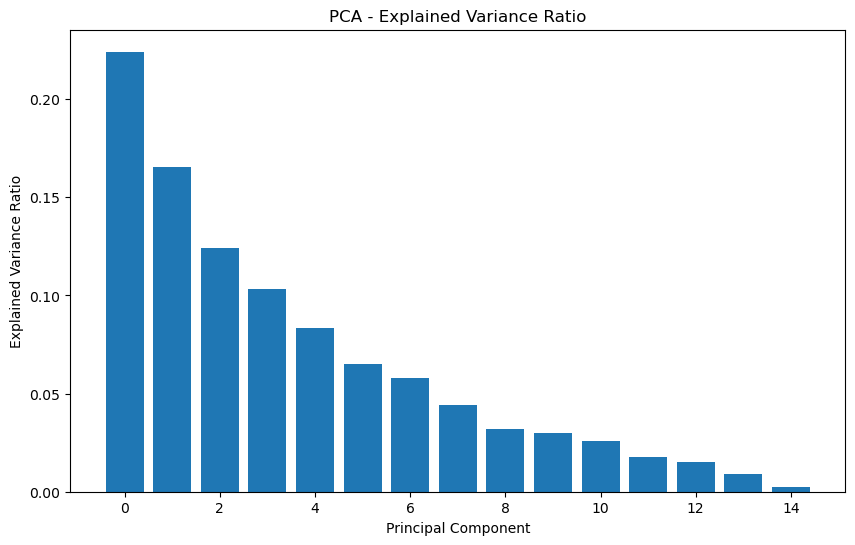

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(input_dim), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance Ratio')
plt.show()

In [216]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Component {i+1}: {ratio:.4f}")

Explained Variance Ratio for Component 1: 0.2242
Explained Variance Ratio for Component 2: 0.1654
Explained Variance Ratio for Component 3: 0.1242
Explained Variance Ratio for Component 4: 0.1033
Explained Variance Ratio for Component 5: 0.0834
Explained Variance Ratio for Component 6: 0.0652
Explained Variance Ratio for Component 7: 0.0581
Explained Variance Ratio for Component 8: 0.0441
Explained Variance Ratio for Component 9: 0.0321
Explained Variance Ratio for Component 10: 0.0297
Explained Variance Ratio for Component 11: 0.0259
Explained Variance Ratio for Component 12: 0.0177
Explained Variance Ratio for Component 13: 0.0149
Explained Variance Ratio for Component 14: 0.0093
Explained Variance Ratio for Component 15: 0.0025


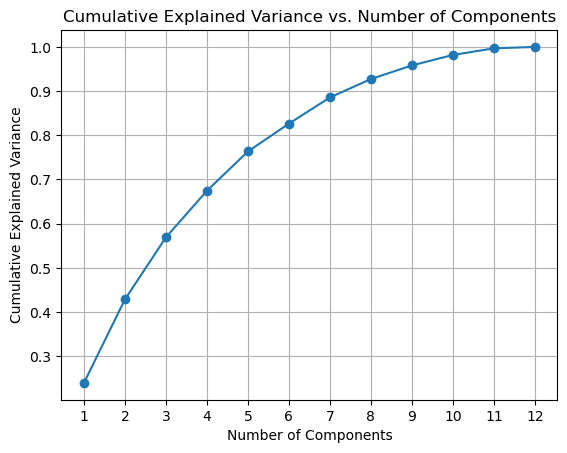

In [217]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratios = [0.2395, 0.1891, 0.1404, 0.1054, 0.0890, 0.0629, 0.0593, 0.0417, 0.0308, 0.0237, 0.0150, 0.0032,]

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratios)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [218]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings matrix
loadings = pca.components_

# Get the original feature names
feature_names = X_train.columns  # Replace X_train with your original dataset

# Print the feature combinations for each principal component
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(component):
        feature_name = feature_names[j]
        print(f"{feature_name}: {feature:.4f}")
    print()

Principal Component 1:
Gender: 0.1195
Age: 0.3395
Study_Level: 0.3656
Floor_Level: -0.1660
Room_Orientation: 0.2539
No_Lights: 0.3364
No_Fans: -0.1043
No_Windows: 0.2471
No_Doors: 0.2927
Floor_Area: 0.3796
Distan_Windows: 0.0994
Temperature_(°C): 0.2791
Humidity_(%): 0.2137
CO2_(PPM): 0.2915
Lighting_Level: 0.1069

Principal Component 2:
Gender: -0.0531
Age: 0.0814
Study_Level: 0.1148
Floor_Level: 0.0458
Room_Orientation: -0.0702
No_Lights: -0.3044
No_Fans: -0.4666
No_Windows: -0.1466
No_Doors: -0.2843
Floor_Area: -0.2192
Distan_Windows: 0.0307
Temperature_(°C): 0.4468
Humidity_(%): -0.1410
CO2_(PPM): 0.4934
Lighting_Level: -0.2139

Principal Component 3:
Gender: 0.4071
Age: -0.2792
Study_Level: -0.2915
Floor_Level: 0.2716
Room_Orientation: 0.1161
No_Lights: -0.0112
No_Fans: -0.0702
No_Windows: 0.4861
No_Doors: 0.0963
Floor_Area: 0.0171
Distan_Windows: 0.3054
Temperature_(°C): 0.1146
Humidity_(%): -0.4448
CO2_(PPM): 0.0947
Lighting_Level: 0.1412

Principal Component 4:
Gender: -0.2718


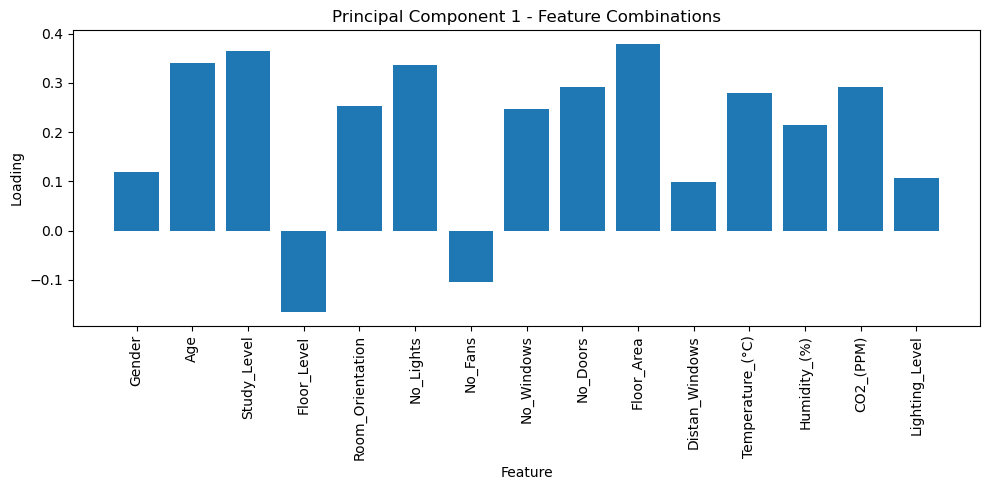

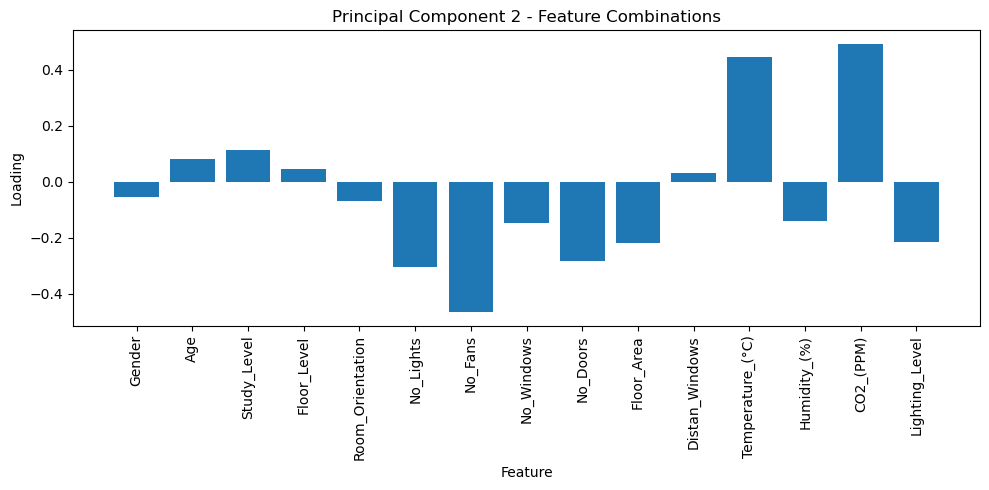

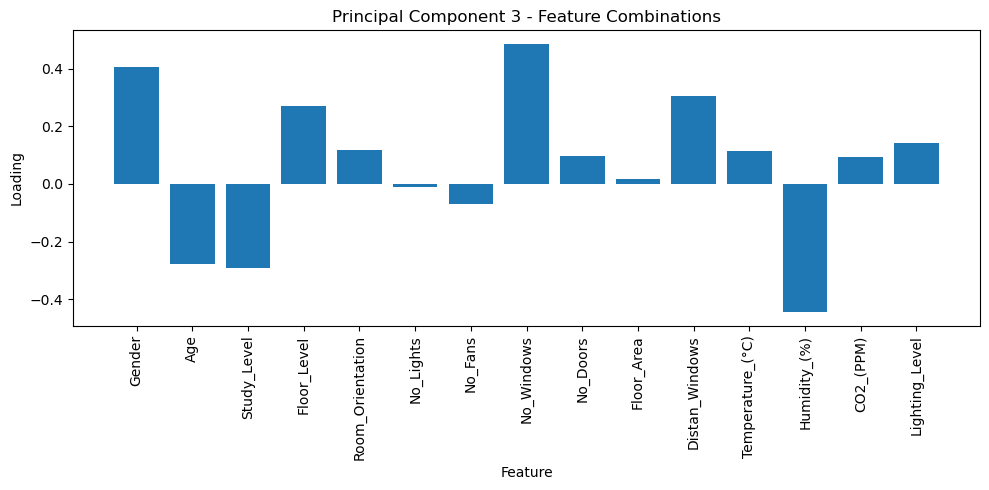

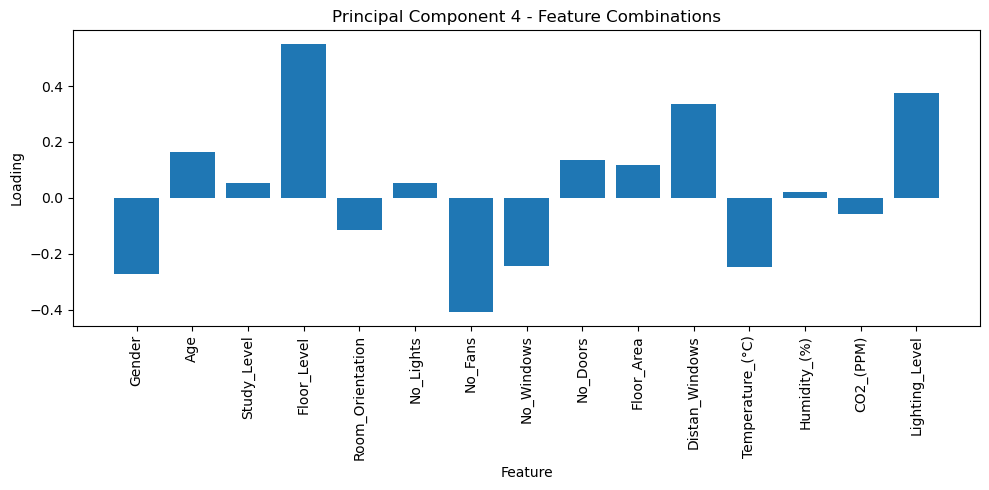

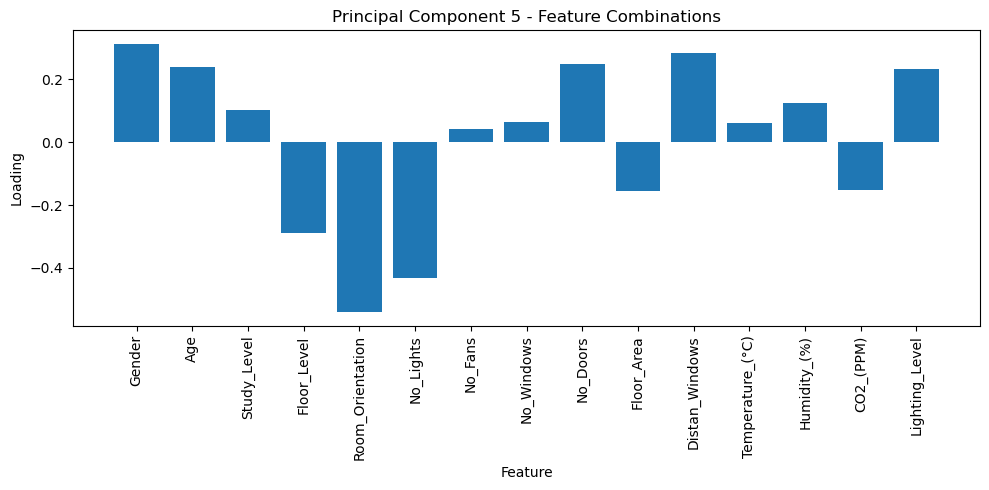

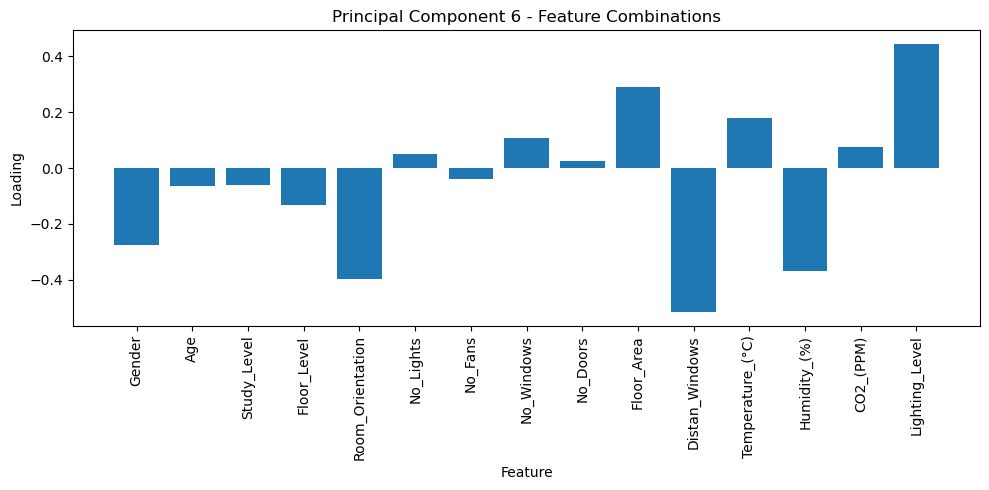

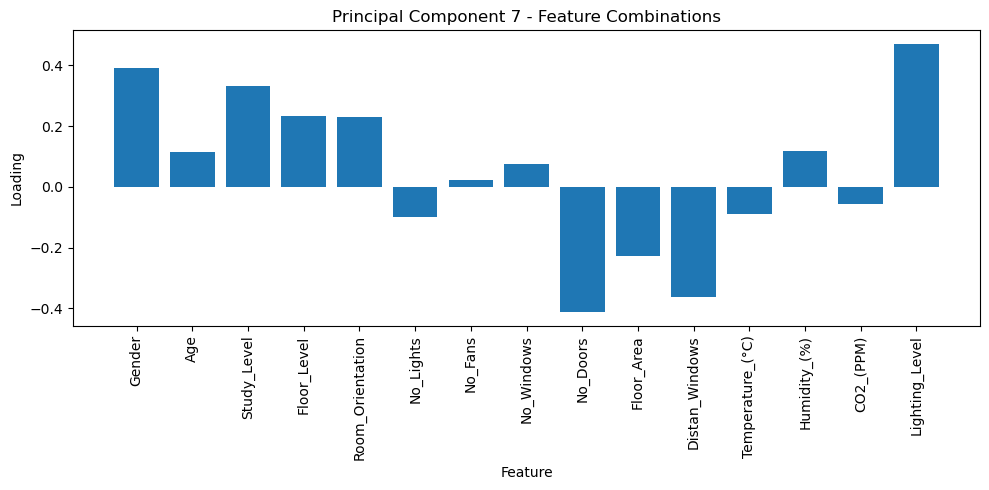

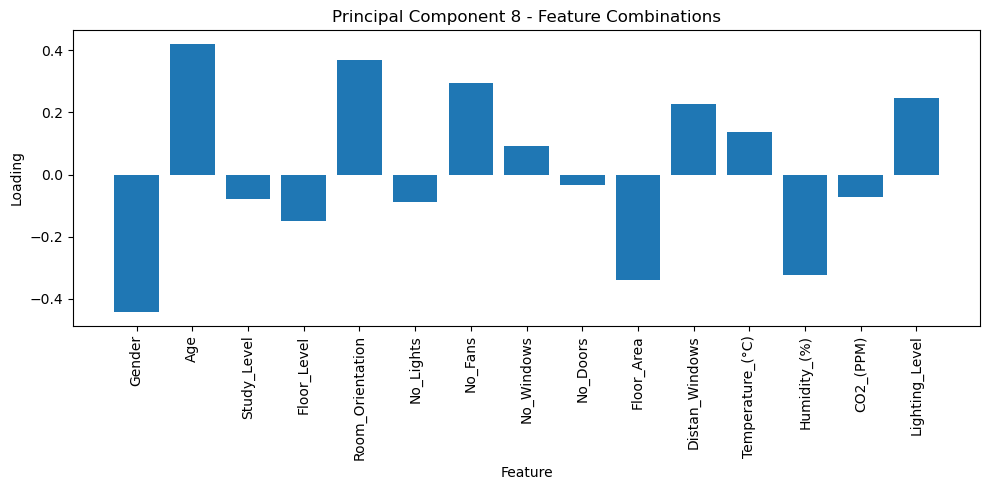

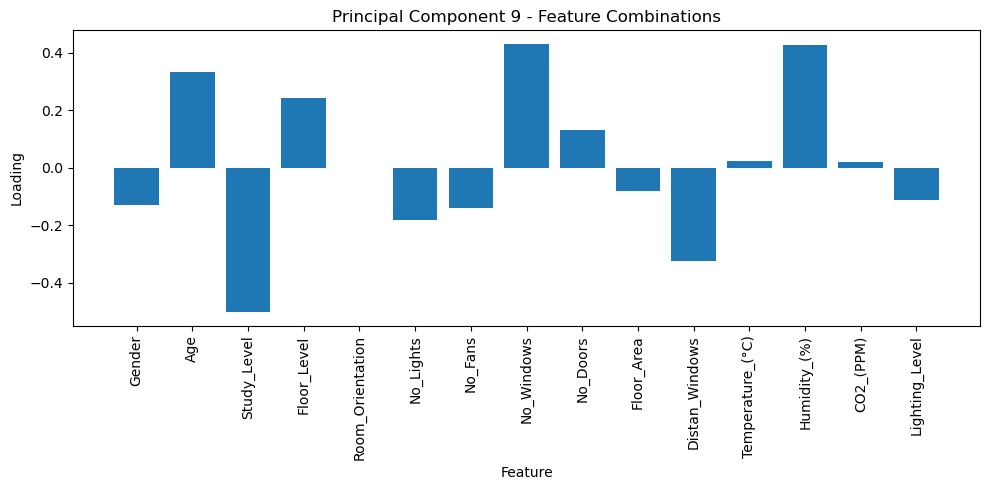

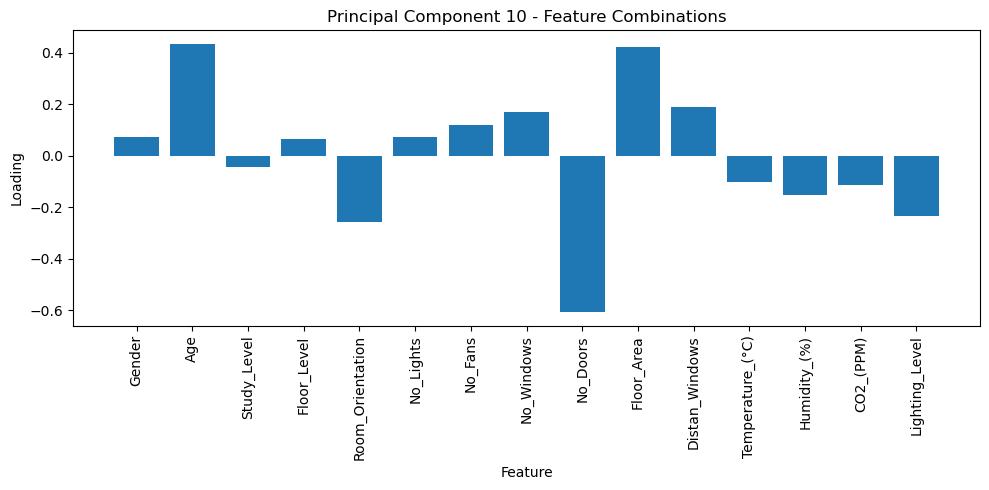

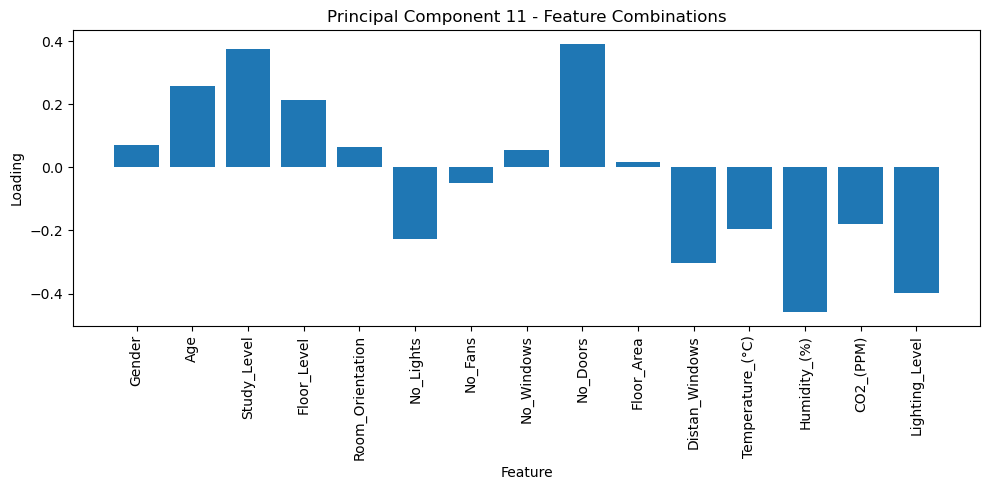

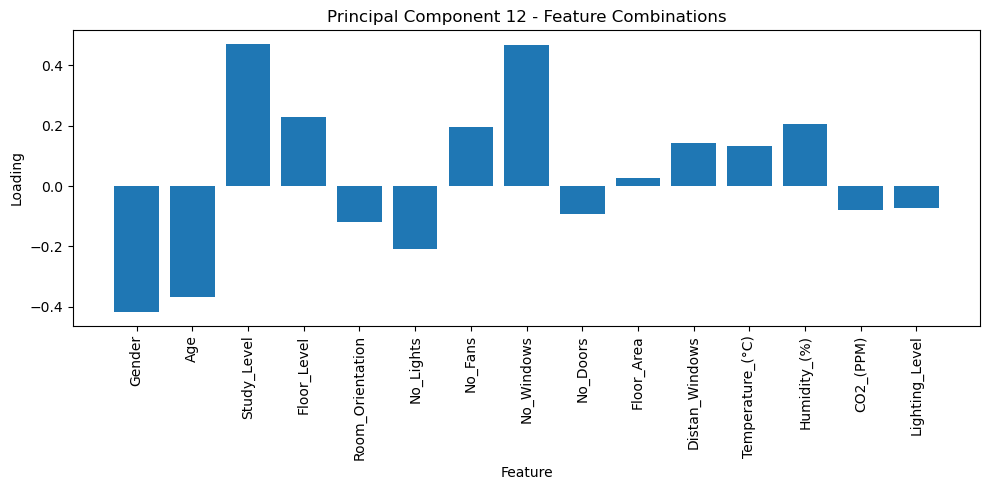

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings matrix
loadings = pca.components_

# Get the original feature names
feature_names = X_train.columns  # Replace X_train with your original dataset

# Create a bar plot for each principal component
for i, component in enumerate(loadings):
    plt.figure(figsize=(10, 5))
    plt.bar(feature_names, component)
    plt.xlabel('Feature')
    plt.ylabel('Loading')
    plt.title(f'Principal Component {i+1} - Feature Combinations')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

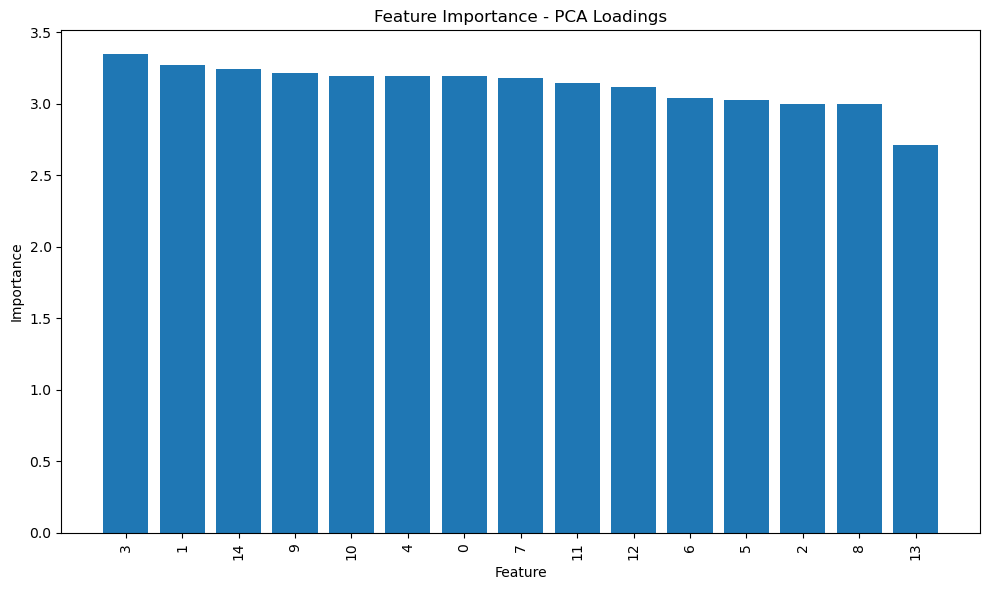

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_indices, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - PCA Loadings')
plt.tight_layout()
plt.show()

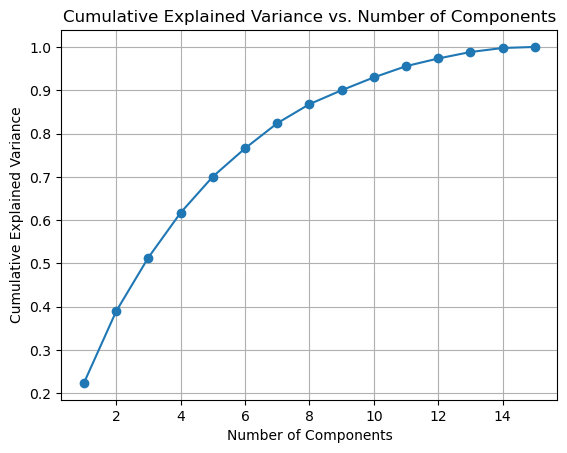

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

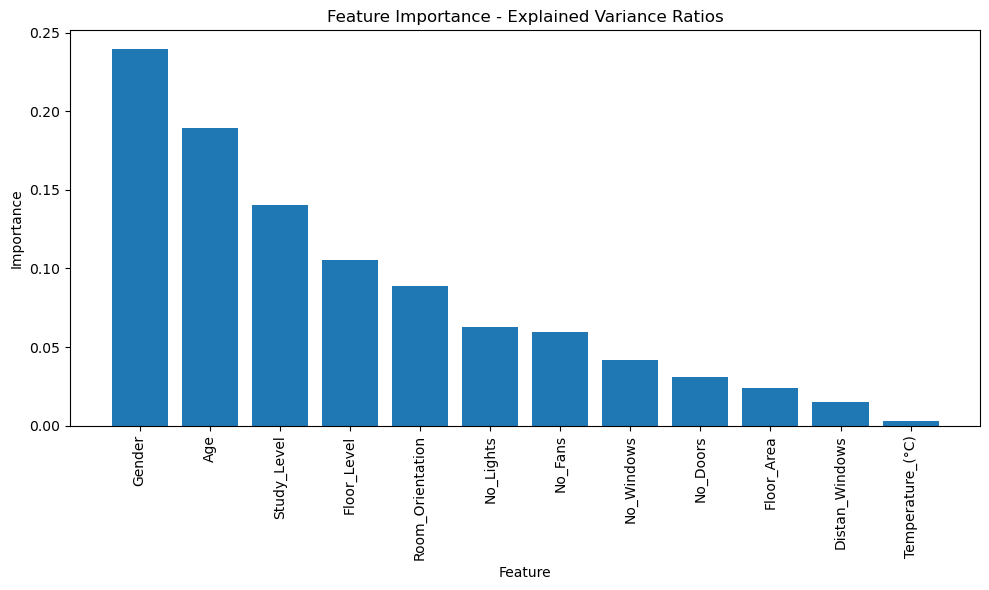

In [222]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratios = [0.2395, 0.1891, 0.1404, 0.1054, 0.0890, 0.0629, 0.0593, 0.0417, 0.0308, 0.0237, 0.0150, 0.0032,]
sorted_indices = np.argsort(explained_variance_ratios)[::-1]
sorted_variances = np.array(explained_variance_ratios)[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_variances)), sorted_variances)
plt.xticks(range(len(sorted_variances)), sorted_feature_names, rotation=90)  # Update the x-axis labels
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Explained Variance Ratios')
plt.tight_layout()
plt.show()

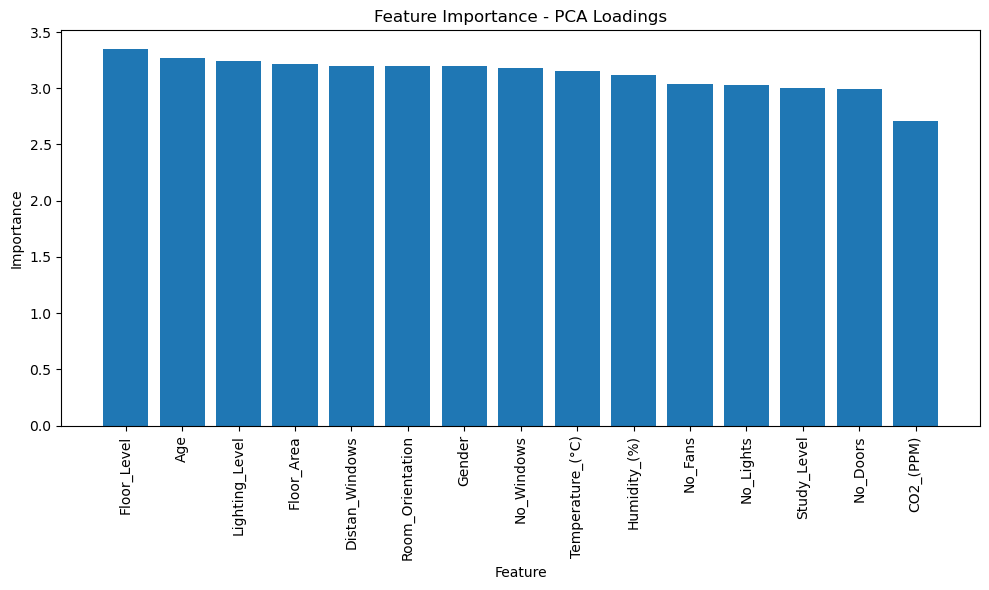

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Create a list of feature names
feature_names = list(inputs.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - PCA Loadings')
plt.tight_layout()
plt.show()

In [224]:
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Create a list of feature names
feature_names = list(inputs.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print the feature importances
print("Feature Importance - PCA Loadings:")
for feature, importance in zip(sorted_feature_names, sorted_importance):
    print(f"{feature}: {importance:.4f}")

Feature Importance - PCA Loadings:
Floor_Level: 3.3475
Age: 3.2705
Lighting_Level: 3.2440
Floor_Area: 3.2155
Distan_Windows: 3.1988
Room_Orientation: 3.1961
Gender: 3.1954
No_Windows: 3.1824
Temperature_(°C): 3.1496
Humidity_(%): 3.1210
No_Fans: 3.0417
No_Lights: 3.0279
Study_Level: 3.0018
No_Doors: 2.9966
CO2_(PPM): 2.7112


In [225]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=input_dim)
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the loadings
loadings = pca.components_

# Calculate the absolute sum of loadings for each feature
feature_importance = np.abs(loadings).sum(axis=0)

# Create a list of feature names
feature_names = list(inputs.columns)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Get the feature values for each feature
feature_values = X_train_scaled.mean(axis=0)

# Create a formatted list of feature values
formatted_feature_values = [f"{value:.2f}" for value in feature_values]

# Create hovertext combining feature name, importance, and value
hovertext = [
    f"Importance: {imp:.2f}<br>Value: {val:.2f}"
    for imp, val in zip(sorted_importance, feature_values)
]

# Create an interactive horizontal bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=sorted_importance,
        y=sorted_feature_names,
        orientation='h',
        hovertext=hovertext,
        hovertemplate="%{y}<br>%{hovertext}<extra></extra>",
    )
])

fig.update_layout(
    title='Feature Importance - PCA Loadings',
    xaxis_title='Importance',
    yaxis_title='Feature',
    yaxis=dict(autorange="reversed")
)

fig.show()
# Save the plot as an HTML file
fig.write_html("plot.html")

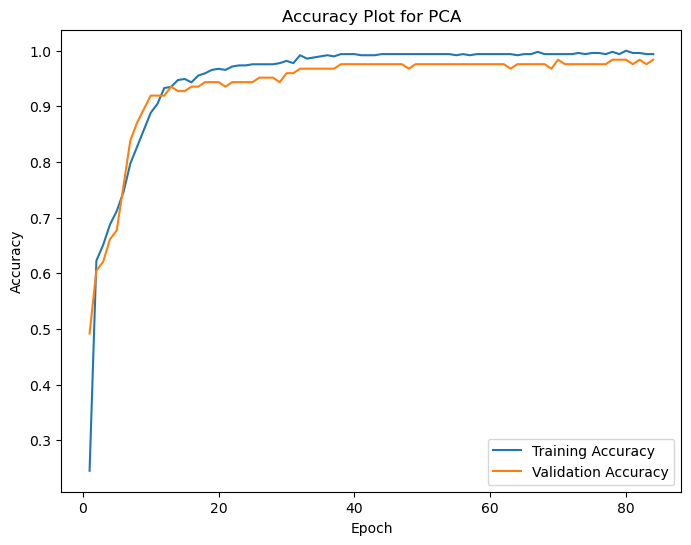

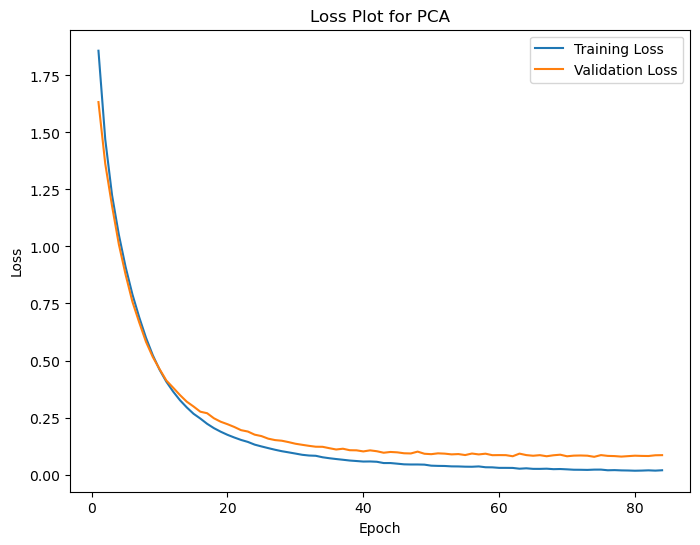

In [226]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_pca.history['accuracy']
val_accuracy = history_pca.history['val_accuracy']
loss = history_pca.history['loss']
val_loss = history_pca.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for PCA')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for PCA')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Feature Importance for Random Forest-based ANN Model

In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Load your dataset and split into features (X) and target variable (y)
X = inputs  
y = target

# Separate inputs and target variable
inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a tree-based model for feature importance
tree_model = RandomForestClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 10  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding features from the dataset
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Define your model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features_to_select,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Multiclass classification with 7 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_tree = model.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3520 - loss: 1.8970 - val_accuracy: 0.6129 - val_loss: 1.6193
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6622 - loss: 1.5085 - val_accuracy: 0.6048 - val_loss: 1.3809
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6396 - loss: 1.3128 - val_accuracy: 0.6774 - val_loss: 1.1548
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 1.0809 - val_accuracy: 0.7339 - val_loss: 0.9874
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.9523 - val_accuracy: 0.7500 - val_loss: 0.8581
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - loss: 0.8092 - val_accuracy: 0.7823 - val_loss: 0.7509
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8201 - loss: 0.7243 - val_accuracy: 0.8226 - val_loss: 0.6748
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8208 - loss: 0.6619 - val_accuracy: 0.8306 - val_loss: 0.

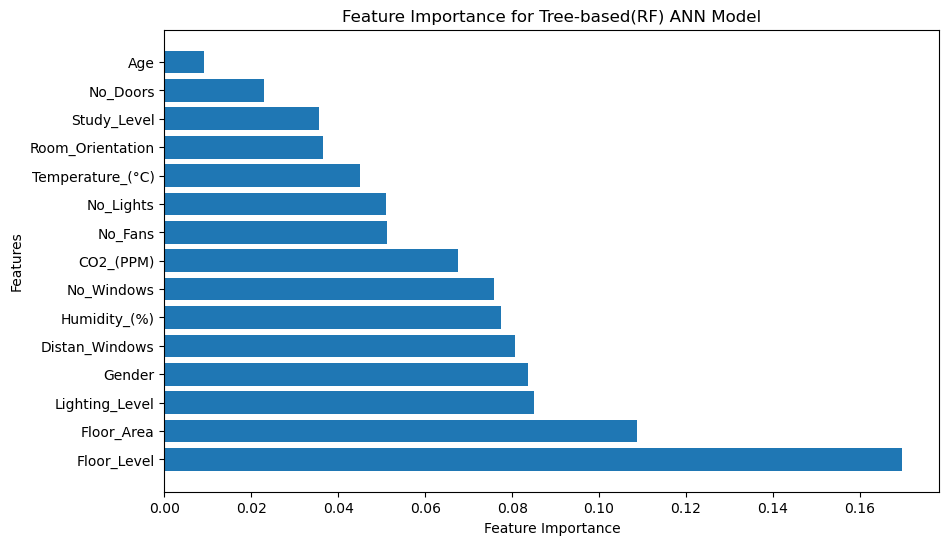

In [199]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 15  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding feature names
selected_feature_names = inputs.columns[selected_feature_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(num_features_to_select), feature_importances[selected_feature_indices], align='center')
plt.yticks(range(num_features_to_select), selected_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Tree-based(RF) ANN Model')
plt.show()

In [200]:
# Get feature importances from the Random Forest model
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 15  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding feature names
selected_feature_names = inputs.columns[selected_feature_indices]

# Print the feature importances
print("Feature Importance - Random Forest:")
for name, importance in zip(selected_feature_names, feature_importances[selected_feature_indices]):
    print(f"{name}: {importance:.4f}")

Feature Importance - Random Forest:
Floor_Level: 0.1698
Floor_Area: 0.1087
Lighting_Level: 0.0849
Gender: 0.0837
Distan_Windows: 0.0806
Humidity_(%): 0.0775
No_Windows: 0.0757
CO2_(PPM): 0.0676
No_Fans: 0.0512
No_Lights: 0.0511
Temperature_(°C): 0.0451
Room_Orientation: 0.0365
Study_Level: 0.0355
No_Doors: 0.0229
Age: 0.0092


In [201]:
# Reverse the feature importances and feature names
feature_importances_reverse = feature_importances[selected_feature_indices][::-1]
selected_feature_names_reverse = selected_feature_names[::-1]

# Create a bar plot using Plotly with reversed order
fig = go.Figure()

# Add horizontal bar chart trace with reversed order
fig.add_trace(go.Bar(
    x=feature_importances_reverse,
    y=selected_feature_names_reverse,
    orientation='h',
    marker_color='blue'
))

# Update layout
fig.update_layout(
    title='Feature Importance for Tree-based (RF) ANN Model',
    xaxis_title='Feature Importance',
    yaxis_title='Features',
    height=500,
    width=800,
    bargap=0.1
)

# Display the plot
fig.show()

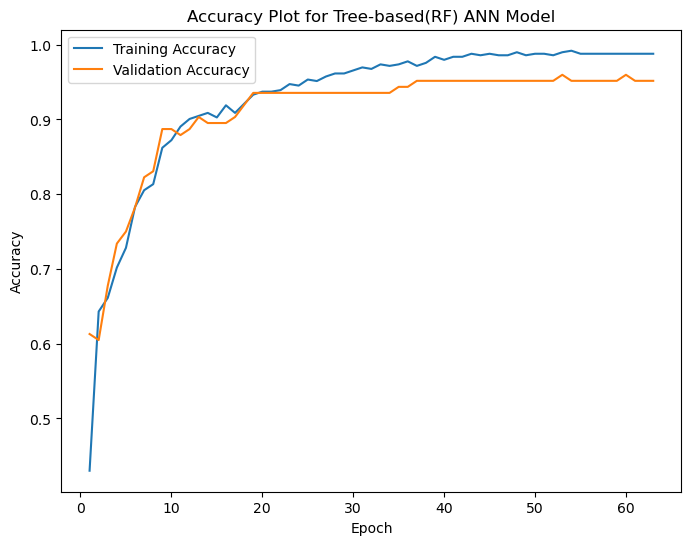

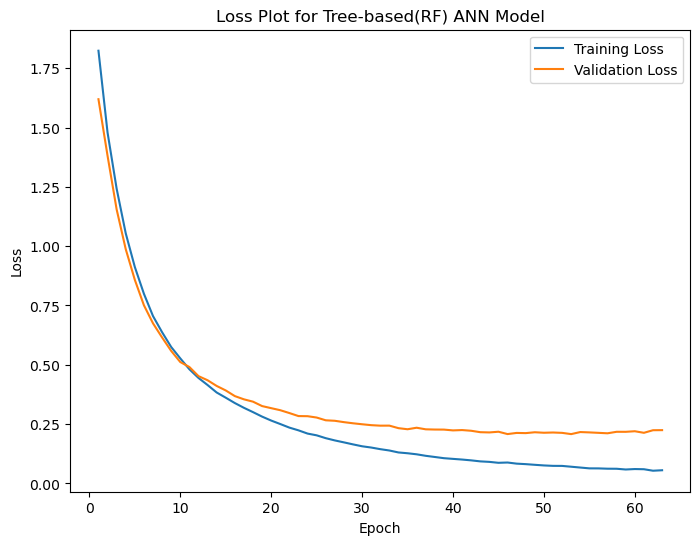

In [202]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_tree.history['accuracy']
val_accuracy = history_tree.history['val_accuracy']
loss = history_tree.history['loss']
val_loss = history_tree.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Tree-based(RF) ANN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Tree-based(RF) ANN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Feature Selection by Lasso using ANN

In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import keras
import plotly.graph_objects as go
from sklearn.linear_model import Lasso

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable

inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Apply Lasso regularization for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(inputs, target)

# Get the selected features and their coefficients
selected_features = inputs.columns[lasso.coef_ != 0]
feature_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for the selected features and coefficients
feature_df = pd.DataFrame({'Selected Features': selected_features, 'Coefficients': feature_coefficients})

# Plot the feature coefficients using horizontal bar plot
fig = go.Figure(data=[go.Bar(y=feature_df['Selected Features'], x=feature_df['Coefficients'], orientation='h')])
fig.update_layout(yaxis=dict(title='Selected Features'), xaxis=dict(title='Coefficients'), title='Selected Features - Lasso Regularization')
fig.show()

# Filter the inputs based on selected features
inputs_selected = inputs[selected_features]

# Apply SMOTE-ENN for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs_selected, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of input features
input_dim = X_train_scaled.shape[1]

# Define the number of output classes
num_classes = len(np.unique(y_train))

# Define the neural network model
model = Sequential()
model.add(Input(shape=(input_dim,)))  # Use Input layer instead of specifying input shape
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history_lasso = model.fit(X_train_scaled, keras.utils.to_categorical(y_train, num_classes),
                    validation_data=(X_test_scaled, keras.utils.to_categorical(y_test, num_classes)),
                    epochs=100, callbacks=[early_stopping])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1733 - loss: 2.0373 - val_accuracy: 0.4907 - val_loss: 1.6719
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5749 - loss: 1.5584 - val_accuracy: 0.5278 - val_loss: 1.4443
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6473 - loss: 1.2820 - val_accuracy: 0.5648 - val_loss: 1.3075
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7022 - loss: 1.0650 - val_accuracy: 0.5648 - val_loss: 1.1684
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7599 - loss: 0.8857 - val_accuracy: 0.6019 - val_loss: 1.0205
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.7450 - val_accuracy: 0.6296 - val_loss: 0.8961
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 0.6681 - val_accuracy: 0.7315 - val_loss: 0.7947
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8390 - loss: 0.6123 - val_accuracy: 0.7593 - 

In [204]:
import plotly.graph_objects as go

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import keras
import plotly.graph_objects as go
from sklearn.linear_model import Lasso

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level',], axis='columns')
target = df['PMV_Level']

# Apply Lasso regularization for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(inputs, target)

# Get the selected features and their coefficients
selected_features = inputs.columns[lasso.coef_ != 0]
feature_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for the selected features and coefficients
feature_df = pd.DataFrame({'Selected Features': selected_features, 'Coefficients': feature_coefficients})

# Plot the feature coefficients using horizontal bar plot
fig = go.Figure(data=[go.Bar(y=feature_df['Selected Features'], x=feature_df['Coefficients'], orientation='h')])
fig.update_layout(yaxis=dict(title='Selected Features'), xaxis=dict(title='Coefficients'), title='Selected Features - Lasso Regularization')

# Add text annotations for feature values
fig.update_layout(
    annotations=[
        go.layout.Annotation(
            x=coeff,
            y=feat,
            text=f"{feat}: {coeff:.4f}",
            showarrow=False,
            font=dict(color='black', size=12),
            xshift=5,
            yshift=0
        ) for feat, coeff in zip(feature_df['Selected Features'], feature_df['Coefficients'])
    ]
)

fig.show()

In [213]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Data preprocessing
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Apply Lasso regularization for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(inputs, target)

# Get the selected features and their coefficients
selected_features = inputs.columns[lasso.coef_ != 0]
feature_coefficients = lasso.coef_[lasso.coef_ != 0]

# Create a DataFrame for the selected features and coefficients
feature_df = pd.DataFrame({'Selected Features': selected_features, 'Coefficients': feature_coefficients})

# Print the feature names and their corresponding coefficients
for feat, coeff in zip(feature_df['Selected Features'], feature_df['Coefficients']):
    print(f"Feature: {feat} - Coefficient: {coeff:.4f}")

Feature: Gender - Coefficient: 0.0018
Feature: Age - Coefficient: 0.2612
Feature: Study_Level - Coefficient: -0.0835
Feature: Floor_Level - Coefficient: 0.0003
Feature: Room_Orientation - Coefficient: -0.0359
Feature: No_Lights - Coefficient: -0.0000
Feature: No_Fans - Coefficient: -0.0161
Feature: No_Windows - Coefficient: 0.0366
Feature: Floor_Area - Coefficient: 0.0097
Feature: Temperature_(°C) - Coefficient: -0.0458
Feature: Humidity_(%) - Coefficient: -0.0156
Feature: CO2_(PPM) - Coefficient: 0.0520
Feature: Lighting_Level - Coefficient: 0.0145


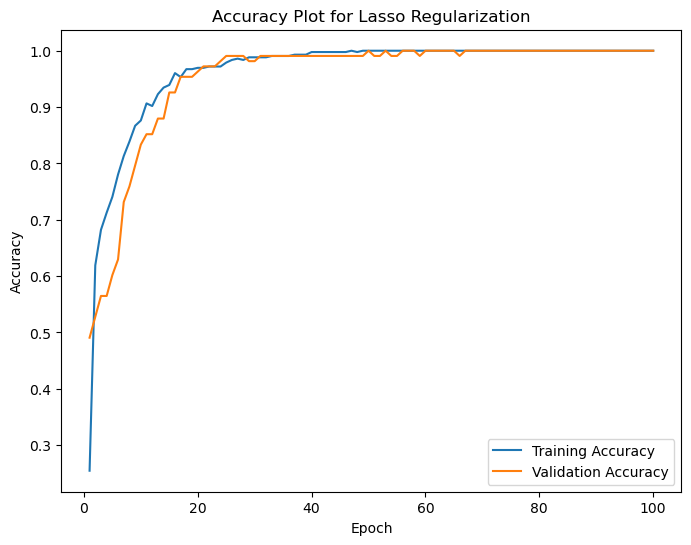

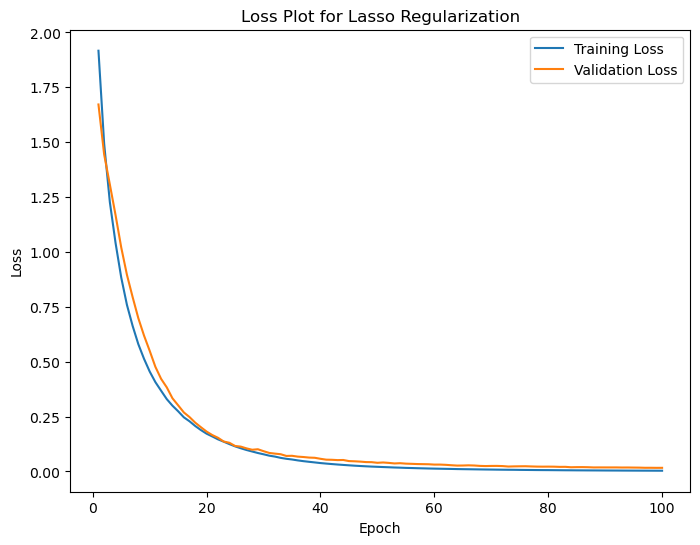

In [205]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_lasso.history['accuracy']
val_accuracy = history_lasso.history['val_accuracy']
loss = history_lasso.history['loss']
val_loss = history_lasso.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Lasso Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Lasso Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ANN-RFE (Artificial Neural Network - Recursive Feature Elimination) approach
"Feature Ranking - Importance Scores (Model: Neural Network)"

In [206]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import RFE
from imblearn.combine import SMOTEENN


# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level'], axis='columns')
target = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using ANN-RFE
num_classes = len(np.unique(y_train))  # Number of output classes
num_features_to_select = 5  # Set the desired number of features to select

# Initialize the ANN classifier
ann_clf = Sequential()
ann_clf.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_clf.add(Dense(64, activation='relu'))
ann_clf.add(Dense(num_classes, activation='softmax'))

# ...

# Create a mask to track selected features
feature_mask = np.ones(X_train_scaled.shape[1], dtype=bool)

# ...

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

import plotly.graph_objects as go

# Train the final ANN model with the selected features
final_ann_clf = Sequential()
final_ann_clf.add(Dense(64, activation='relu', input_dim=np.sum(feature_mask)))
final_ann_clf.add(Dense(64, activation='relu'))
final_ann_clf.add(Dense(num_classes, activation='softmax'))

final_ann_clf.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_selected = X_train_scaled[:, feature_mask]
X_test_selected = X_test_scaled[:, feature_mask]

early_stop = EarlyStopping(patience=10)  # Define EarlyStopping callback

history_rfe = final_ann_clf.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test),
                            epochs=50, callbacks=[early_stop])

X_train_scaled shape: (493, 15)
X_test_scaled shape: (124, 15)
Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1258 - loss: 1.9900 - val_accuracy: 0.5726 - val_loss: 1.7005
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6236 - loss: 1.5858 - val_accuracy: 0.6129 - val_loss: 1.4514
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6654 - loss: 1.3101 - val_accuracy: 0.6210 - val_loss: 1.2517
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6244 - loss: 1.1211 - val_accuracy: 0.6371 - val_loss: 1.0712
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.9610 - val_accuracy: 0.6613 - val_loss: 0.9244
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.8338 - val_accuracy: 0.7339 - val_loss: 0.8021
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7794 - loss: 0.6885 - val_accuracy: 0.7823 - val_loss: 0.7155
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.6080 - val_accuracy: 0.8226 - val_loss: 0.6414
Ep

In [207]:
# Retrieve the weights of the first layer
weights = final_ann_clf.get_weights()[0]

# Compute the feature importance scores
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort the features based on their importance scores
sorted_features = np.argsort(feature_importance)[::-1]

# Print the feature importance scores and corresponding feature names
for i, feature_index in enumerate(sorted_features):
    feature_name = inputs.columns[feature_index]
    importance_score = feature_importance[feature_index]
    print(f"Feature {i+1}: {feature_name} ({importance_score})")

Feature 1: Lighting_Level (14.187198638916016)
Feature 2: Floor_Level (14.150463104248047)
Feature 3: No_Windows (13.737844467163086)
Feature 4: Gender (13.637399673461914)
Feature 5: Distan_Windows (13.01562786102295)
Feature 6: Room_Orientation (12.673967361450195)
Feature 7: Floor_Area (11.661449432373047)
Feature 8: Temperature_(°C) (11.6199951171875)
Feature 9: Study_Level (11.526432991027832)
Feature 10: No_Lights (11.30916976928711)
Feature 11: No_Fans (10.892181396484375)
Feature 12: No_Doors (10.864044189453125)
Feature 13: Humidity_(%) (10.688102722167969)
Feature 14: Age (10.597799301147461)
Feature 15: CO2_(PPM) (10.148369789123535)


In [208]:
import plotly.graph_objects as go

# Retrieve the weights of the first layer
weights = final_ann_clf.get_weights()[0]

# Compute the feature importance scores
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort the features based on their importance scores
sorted_features = np.argsort(feature_importance)[::-1]

# Get the feature names and importance scores
feature_names = [inputs.columns[feature_index] for feature_index in sorted_features]
importance_scores = [feature_importance[feature_index] for feature_index in sorted_features]

# Create the horizontal bar plot
fig = go.Figure(data=go.Bar(
    x=importance_scores,
    y=feature_names,
    orientation='h'
))

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Importance Score'),
    yaxis=dict(title='Feature'),
    title='Feature Importance_Recursive Feature Elimination'
)

# Show the interactive plot
fig.show()

In [209]:
import plotly.graph_objects as go

# Retrieve the weights of the first layer
weights = final_ann_clf.get_weights()[0]

# Compute the feature importance scores
feature_importance = np.sum(np.abs(weights), axis=1)

# Sort the features based on their importance scores in descending order
sorted_features = np.argsort(feature_importance)[::-1]

# Get the feature names and importance scores
feature_names = [inputs.columns[feature_index] for feature_index in sorted_features]
importance_scores = [feature_importance[feature_index] for feature_index in sorted_features]

# Create the horizontal bar plot
fig = go.Figure(data=go.Bar(
    x=importance_scores,
    y=feature_names,
    orientation='h'
))

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Importance Score'),
    yaxis=dict(title='Feature'),
    title='Feature Importance_Recursive Feature Elimination'
)

# Reverse the y-axis to start with the highest importance at the top
fig.update_yaxes(autorange="reversed")

# Show the interactive plot
fig.show()

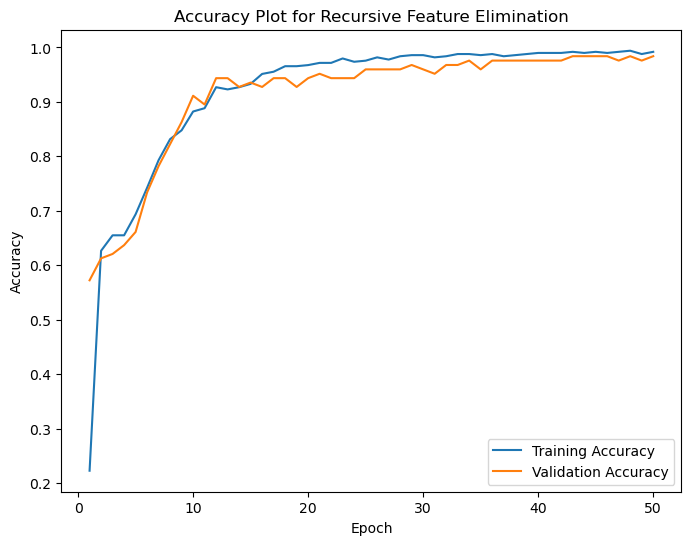

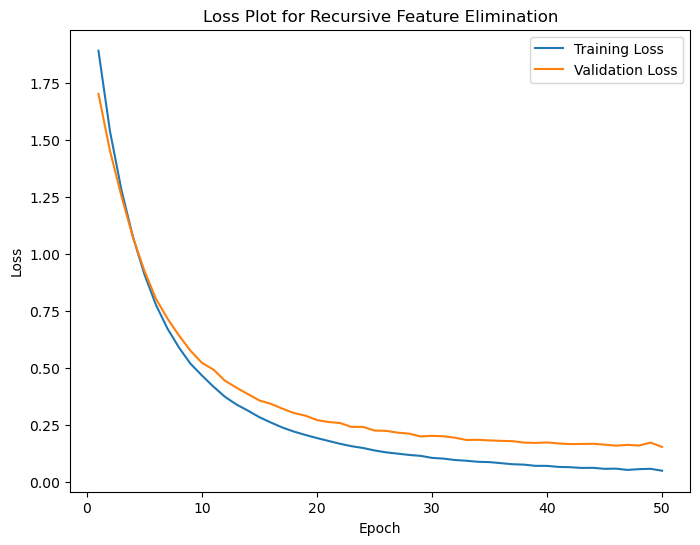

In [210]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_rfe.history['accuracy']
val_accuracy = history_rfe.history['val_accuracy']
loss = history_rfe.history['loss']
val_loss = history_rfe.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Recursive Feature Elimination')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Recursive Feature Elimination')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


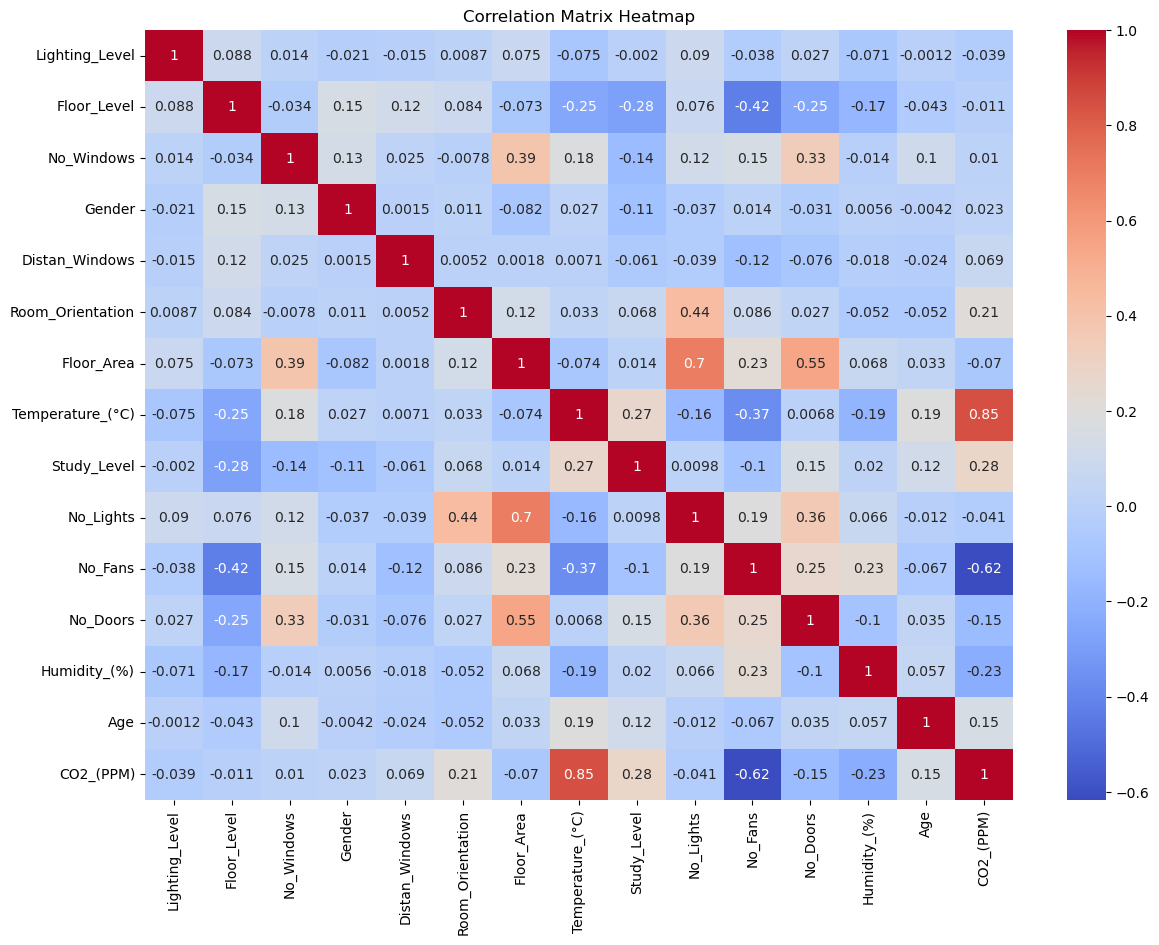

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the feature names and their values
df_features = pd.DataFrame(inputs, columns=feature_names)

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()